# Lab 12: Epidemics, or the Spread of Viruses

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
import networkx as nx
from scipy.integrate import odeint
from operator import itemgetter
print ('Modules Imported!')

Modules Imported!


## Epidemics, or the Spread of Viruses:

The study of how viruses spread through populations began well over a hundred years ago.  The original studies concerned biological viruses, but the principles found application in modeling the spread of ideas or practices in social networks (such as what seeds farmers use) even before the advent of computers.  More recently, computer networks, and in particular, on-line social networks, have stimulated renewed attention on the theory, to model, for example, the spread of computer viruses through networks, the adoption of new technology, and the spread of such things as ideas and emotional states through social networks.

One of the simplest models for the spread of infection is the discrete-time Reed Frost model, proposed in the 1920s.  It goes as follows.   Suppose the individuals that can be infected are the nodes of an undirected graph.   An edge between two nodes indicates a pathway for the virus to spread from one node to the other node.   The Reed Frost model assumes that each node is in one of three states at each integer time $t\geq 0:$  susceptible, infected, or removed.  This is thus called an SIR model.  At $t=0$, each individual is either susceptible or infected. The evolution over one time step is the following.   A susceptible node has a chance $\beta$ to become infected by each of its infected neighbors, with the chances from different neighbors being independent. Thus if a susceptible node has $k$ infected neighbors at time $t,$ the probability the node is *not* infected at time $t+1$ (i.e. it remains susceptible) is $(1-\beta)^k,$  and the probability the node is infected at time $t+1$ is $1-(1-\beta)^k.$   It is assumed that a node is removed one time step after being infected, and once a node is removed, it remains removed forever.  In applications, removed could mean the node has recovered and has gained immunity, so infection is no longer spread by that node.  To summarize, the model is completely determined by the graph, the initial states of the nodes, and the parameter $\beta.$

One question of interest is how likely is the virus to infect a large fraction of nodes, and how quickly will it spread.  Other questions are to find the effect of well connected clusters in the graph, or the impact of nodes of large degree, on the spread of the virus.  If the virus represents adoption of a new technology, the sponsoring company might be interested in finding a placement of initially infected nodes (achieved by free product placements) to maximize the chances that most nodes become infected. Below is code that uses the Networkx package to simulate the spread of a virus. 

A simple special case, and the one considered first historically, is if the virus can spread from any node to any other node.   This corresponds to a tightly clustered population; the graph is the complete graph.   For this case, the system can be modeled by a three dimensional Markov process $(X_t)$ with a state $(S,I,R),$ denoting the numbers of susceptible, infected, and removed, nodes, respectively.  Given $X_t=(S,I,R),$  the distribution of $X_{t+1}$ is determined by generating the number of newly infected nodes, which has the binomial distribution with parameters $S$ and $p=1-(1-\beta)^I$ (because each of the susceptible nodes is independently infected with probability $p.$)

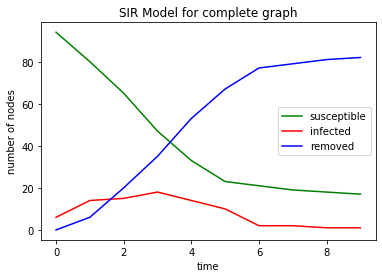

In [24]:
#  Simulation of Reed Frost model for fully connected graph (aka mean field model)
#  X[t,:]=[number susceptible, number infected, number removed] at time t
#  Since odeint wants t first in trajectories X[t,i], let's do that consistently

n=100       # Number of nodes
I_init=6    # Number of nodes initially infected, the others are initially susceptible

c=2.0  # Use a decimal point when specifying c.
beta=c/n  # Note that if n nodes each get infected with probability beta=c/n,
          # then c, on average, are infected.  

T=100  # maximum simulation time
X = np.zeros((T+1,3),dtype=np.int)


X[0,0], X[0,1] = n-I_init, I_init
t=0
while t<T and X[t,1]>0:   # continue (up to time T) as long as there exist infected nodes
    newI=np.random.binomial(X[t,0],1.0-(1.0-beta)**X[t,1])  # number of new infected nodes
    X[t+1,0]=X[t,0]-newI
    X[t+1,1]=newI
    X[t+1,2]=X[t,1]+X[t,2]
    t=t+1

plt.figure()
plt.plot(X[0:t,0], 'g', label='susceptible')
plt.plot(X[0:t,1], 'r', label='infected')
plt.plot(X[0:t,2], 'b', label='removed')
plt.title('SIR Model for complete graph')
plt.xlabel('time')
plt.ylabel('number of nodes')
plt.legend()

Run the code a few times to get an idea of the variations that can occur.  Then try increasing n to 1000 or 10,000 and running the simulation a few more times.  Note that the code scales down the infection parmeter $\beta$ inversely with respect to the population size, that is: $\beta = c/n$ for a constant $c.$   If, instead, $\beta$ didn't depend on $n,$  then the infection would spread much faster for large $n$ and the fully connected graph.  A key principle of the spread of viruses (or branching processes) is that the number infected will tend to increase if the mean number, $F,$ of new infections caused by each infected node satisfies $F>1.$  
<br>
**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>**  In the simulation with $n$ large you should see the number of infected nodes increase and then decrease at some *turnaround time.*  Determine how the turnaround time depends on the fraction of nodes that are susceptible. How does the constant $c$ enter into this relationship? It may be helpful to change the value of $c$ a few times and view how it effects the graph. (You do not need to write code for this problem--you can write your answer in a markdown cell).

__Answer:__ for every one infected the probability it caused a infection is beta=c/n, so F of new infection by each infected node <1, the infected rate begin to decrease, so this situation is now susceptible node<=n/c. That is turnaround appear which susceptible node only 1/c as before.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>** 

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** We have assumed that an infected node is removed from the population after a single time step. If you were modeling the spread of a tweet this might be a good idea. If a tweet doesn't get retweeted immediately the probability that it does later is very close to 0. However, with something like a virus, an individual tends to be infected for more than a single day. Suppose $\gamma$ represents the probability an individual that is infected in one time step is removed from the population by the next time step.  So the number of time slots an individual is infected has the geometric distribution with mean $1/\gamma$.

<ol>
    <li> Modify the code above to include $\gamma = .25$.  
    <li> Determine how allowing nodes to remain infected for multiple time slots (according to $\gamma$) changes the answer to the previous problem.
</ol>

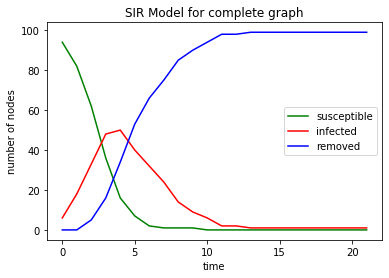

In [38]:
# Your code here
n=100       # Number of nodes
I_init=6    # Number of nodes initially infected, the others are initially susceptible

c=2.0  # Use a decimal point when specifying c.
beta=c/n  # Note that if n nodes each get infected with probability beta=c/n,
          # then c, on average, are infected.  
gama=0.3
T=100  # maximum simulation time
X = np.zeros((T+1,3),dtype=np.int)


X[0,0], X[0,1] = n-I_init, I_init
t=0
while t<T and X[t,1]>0:   # continue (up to time T) as long as there exist infected nodes
    newI=np.random.binomial(X[t,0],1.0-(1.0-beta)**X[t,1])  # number of new infected nodes
    newR=np.random.binomial(X[t,1],gama)
    X[t+1,0]=X[t,0]-newI
    X[t+1,1]=X[t,1]+newI-newR
    X[t+1,2]=newR+X[t,2]
    t=t+1

plt.figure()
plt.plot(X[0:t,0], 'g', label='susceptible')
plt.plot(X[0:t,1], 'r', label='infected')
plt.plot(X[0:t,2], 'b', label='removed')
plt.title('SIR Model for complete graph')
plt.xlabel('time')
plt.ylabel('number of nodes')
plt.legend()

__Answer:__ the appearance of gamma allows the fraction of susceptible to be even smaller than 1/c when turnaround happend

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>** 

If you run your previous code for n larger than 1000 the output should be nearly the same on each run (depending on the choice of $c$ and $\gamma$).   In fact, for $n$ large the trajectory should follow the ode (based on the same principles explored in the previous lab):

$\frac{dS}{dt} = -\beta IS $     

$\frac{dI}{dt} = \beta IS - \gamma I$ 

$\frac{dR}{dt} = \gamma I$ 

The ode is derived based on condidering the expected value of the Makov process at a time $t+1,$  given the state is $(S,I,R)$
at time $t.$  Specifically, each of $I$ infected nodes has a chance to infect each of $S$ susceptible nodes, yielding an expected
number of new infected nodes $\beta I S.$  (This equation overcounts the expected number of infections because a node can simultaneously be infected by two of its neighbors, but the extent of overcounting is small if $\beta$ is small.)  Those nodes cause a decrease in $S$ and an increase in $I.$   Similarly, the expected number of susceptible nodes becoming removed is $\gamma I.$
 

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** Use the odeint method (as in Lab 11)  to integrate this three dimensional ode and graph the results vs. time.   Try to match the plot you generated for the previous problem for the parameter values $n=1000,$ $\gamma = 0.25,$ and $\beta=c/n$ with $c=2.0.$   To get the best match, plot your solution for about the same length of time as the stochastic simulation takes.

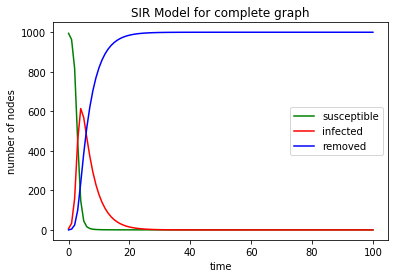

In [52]:
# Your code here
n=1000
gama=0.25
beta=c/n
c=2.0

t=0
def y(x,t):
    y=[]
    y.append(-beta*x[1]*x[0])
    y.append(beta*x[1]*x[0]-gama*x[1])
    y.append(gama*x[1])
    return y

time=np.linspace(0.0,100,101)
xinit=np.array([994.0,6.0,0])
x=odeint(y,xinit,time)
plt.figure()
plt.plot(time,x[:,0], 'g', label='susceptible')
plt.plot(time,x[:,1], 'r', label='infected')
plt.plot(time,x[:,2], 'b', label='removed')
plt.title('SIR Model for complete graph')
plt.xlabel('time')
plt.ylabel('number of nodes')
plt.legend()

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>** 

The above simulations and calculations did not involve graphical structure.  The following code simulates the Reed Frost model for a geometric random graph (we encountered such graphs in Lab 7.  Since each node has only a few neighbors, we no longer scale the parameter $\beta$ down with the total number of nodes.

Infection probability parameter beta= 0.3
Nodes infected at time 0 : [0]


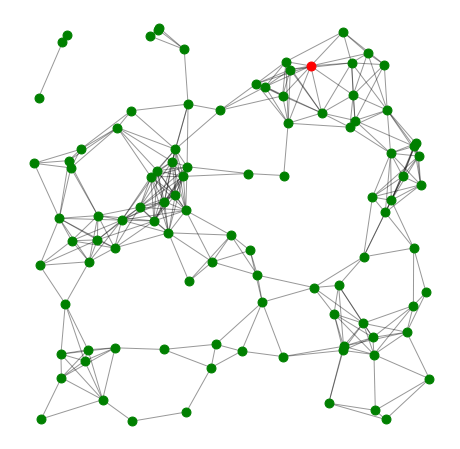

Nodes infected at time 1 : [0, 12, 19, 81, 90]


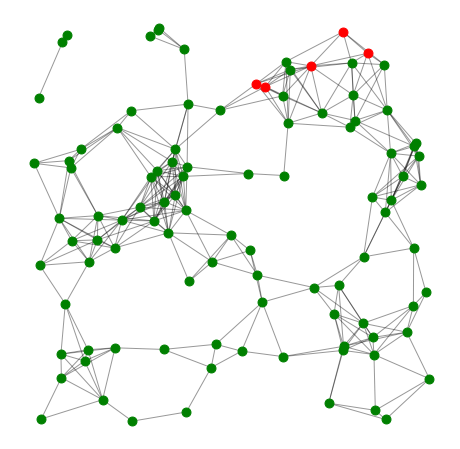

Nodes infected at time 2 : [0, 12, 17, 46, 53, 57, 65, 77, 81, 90]


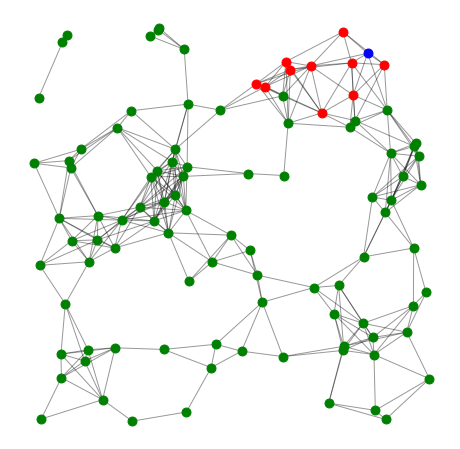

Nodes infected at time 3 : [5, 12, 34, 58, 59, 65, 81, 82]


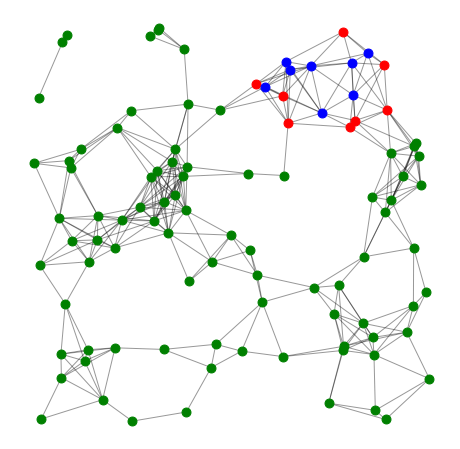

Nodes infected at time 4 : [34, 58, 61, 66, 69, 81]


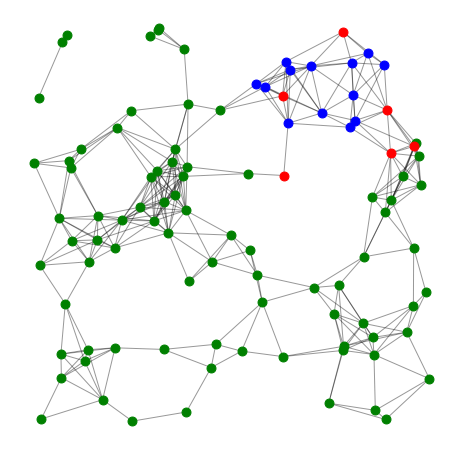

Nodes infected at time 5 : [6, 34, 58, 61, 63, 64, 66, 85]


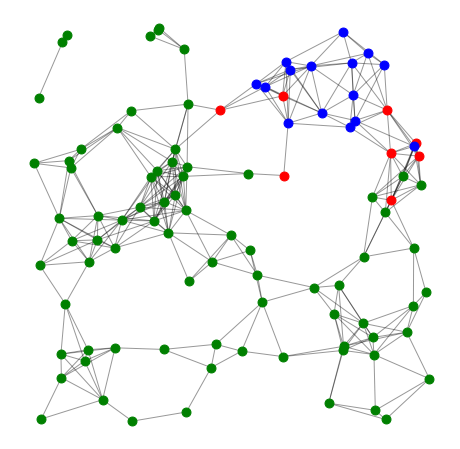

Nodes infected at time 6 : [21, 23, 38, 39, 41, 61, 63, 66, 85]


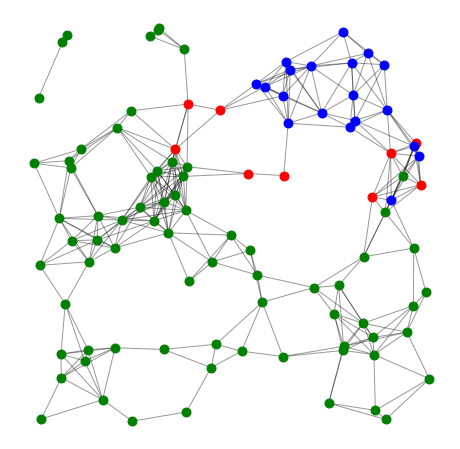

Nodes infected at time 7 : [54, 61, 70, 84]


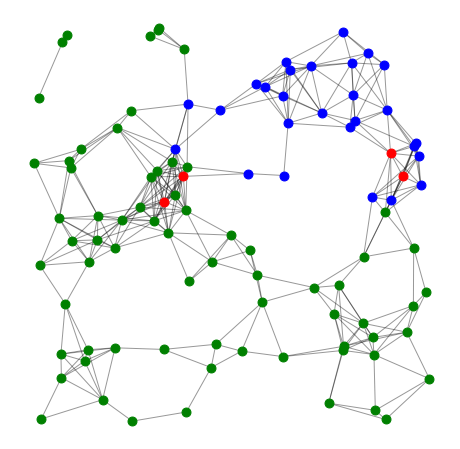

Nodes infected at time 8 : [27, 68, 73, 78, 88]


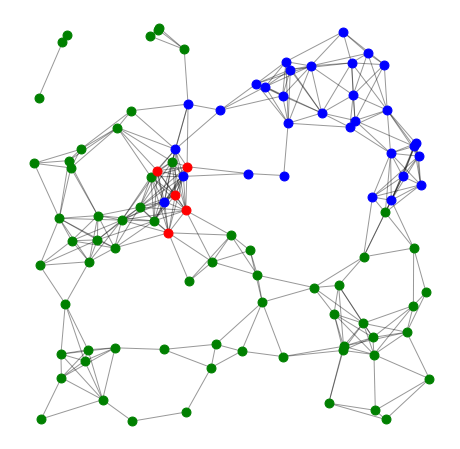

Nodes infected at time 9 : [4, 18, 24, 25, 27, 42, 50, 56, 73, 78]


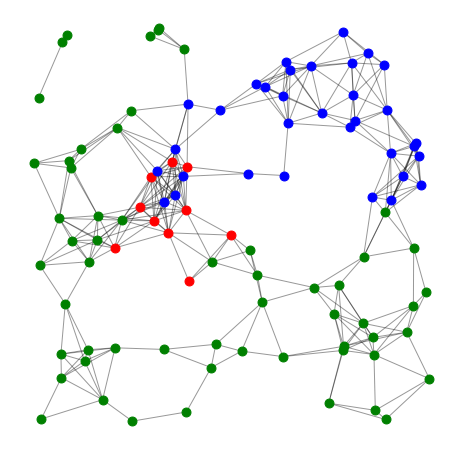

Nodes infected at time 10 : [4, 8, 18, 29, 73, 78, 93, 98]


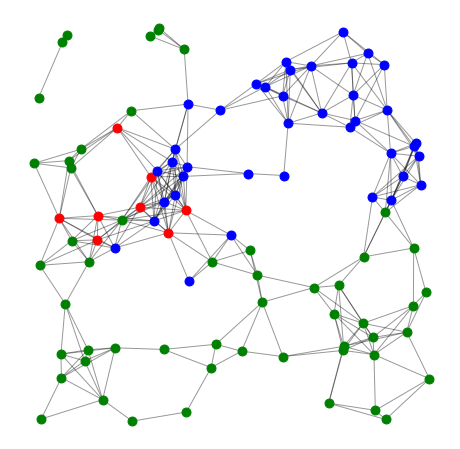

Nodes infected at time 11 : [4, 8, 16, 29, 30, 35, 36, 67, 73]


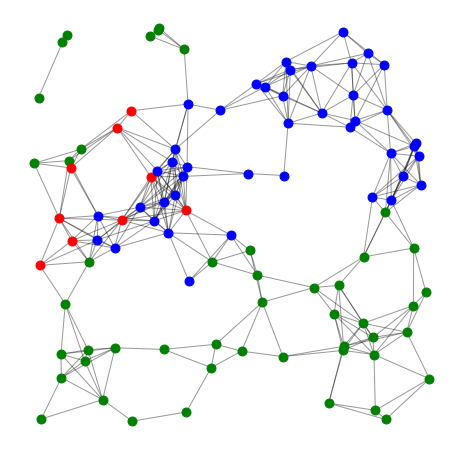

Nodes infected at time 12 : [16, 29, 36, 51, 83, 94]


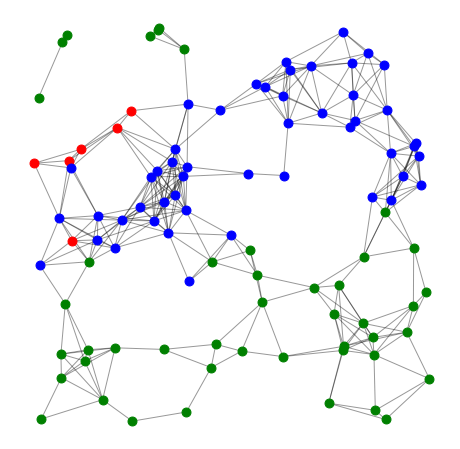

Nodes infected at time 13 : [16, 83, 91, 94]


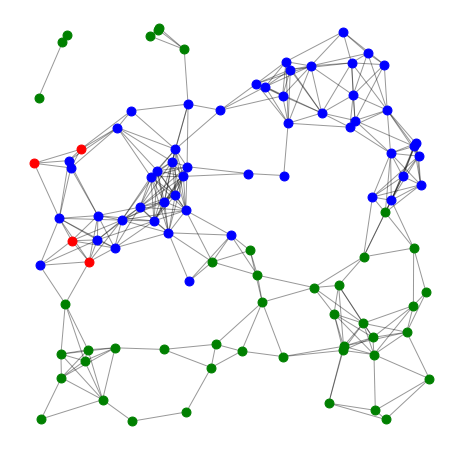

Nodes infected at time 14 : [16, 83, 91]


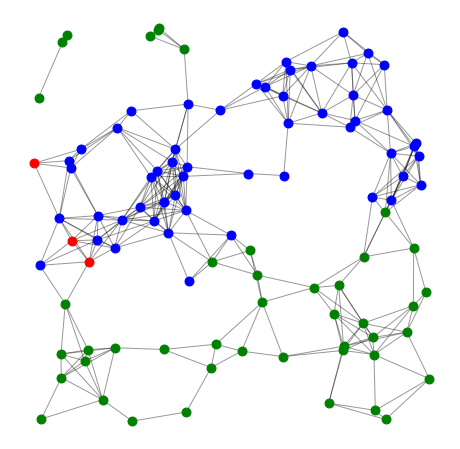

Nodes infected at time 15 : [16, 83, 91]


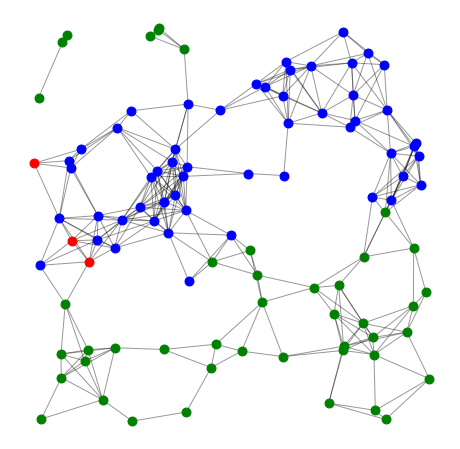

Nodes infected at time 16 : [14, 91]


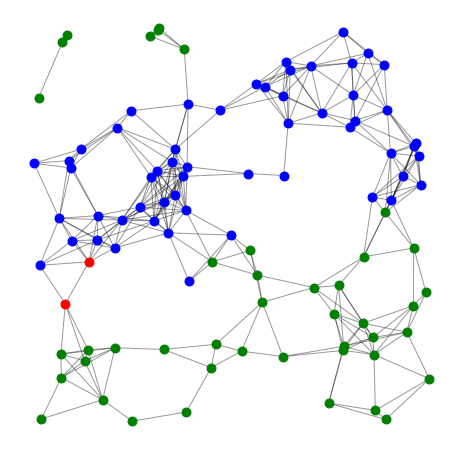

Nodes infected at time 17 : [14, 91]


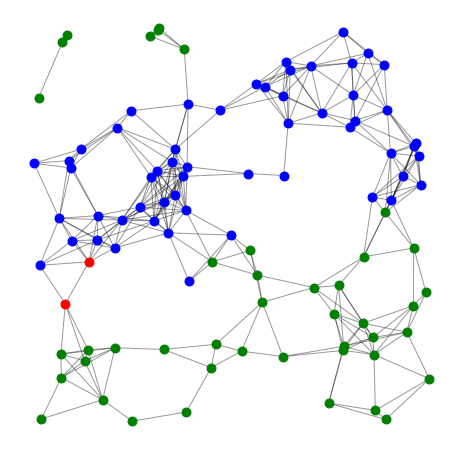

Nodes infected at time 18 : [14, 86]


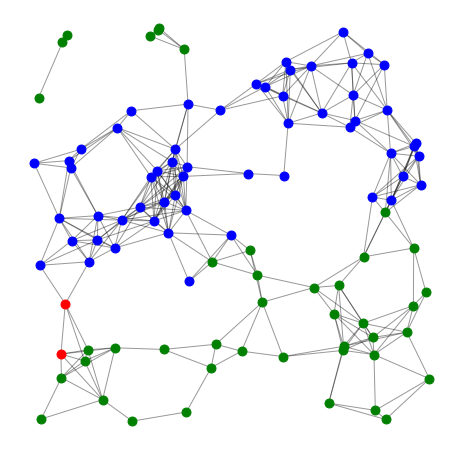

Nodes infected at time 19 : [86]


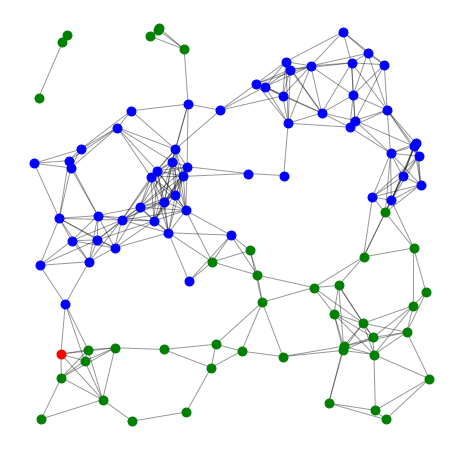

Nodes infected at time 20 : [11, 97]


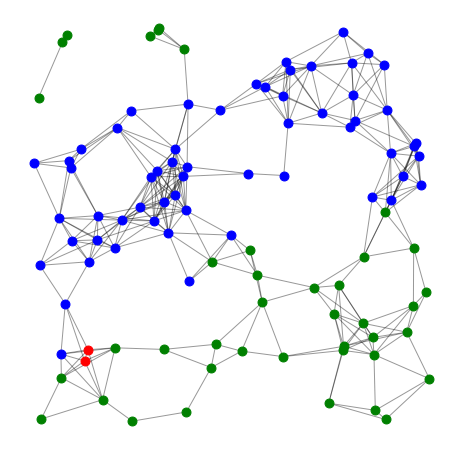

Nodes infected at time 21 : [11, 55, 62, 97]


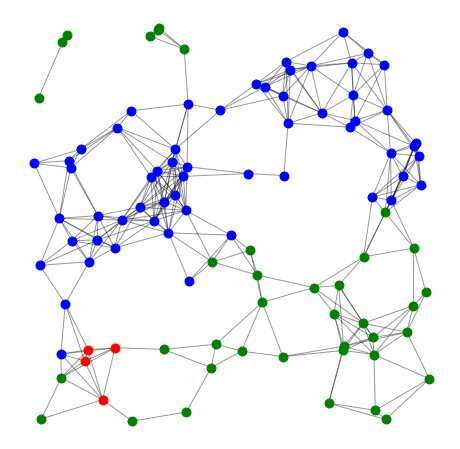

Nodes infected at time 22 : [11, 15, 40, 62]


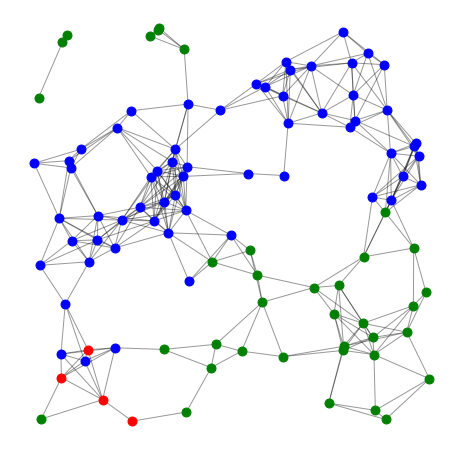

Nodes infected at time 23 : [32, 40, 52, 62]


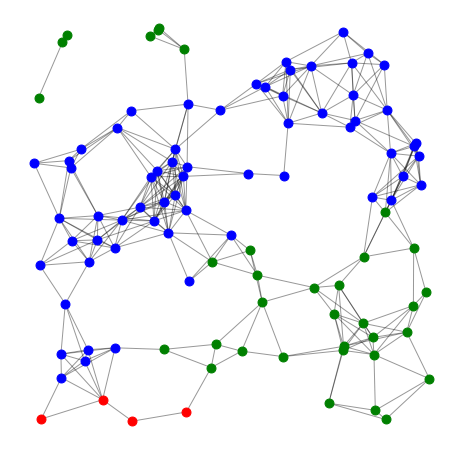

Nodes infected at time 24 : [20, 52, 62]


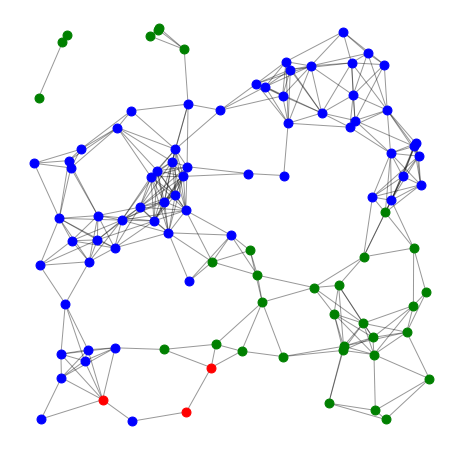

Nodes infected at time 25 : [13, 20, 62]


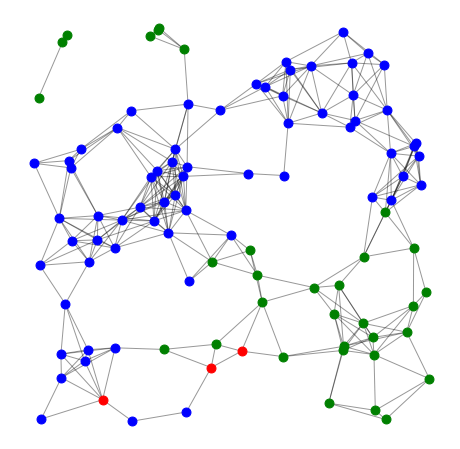

Nodes infected at time 26 : [2, 9, 47]


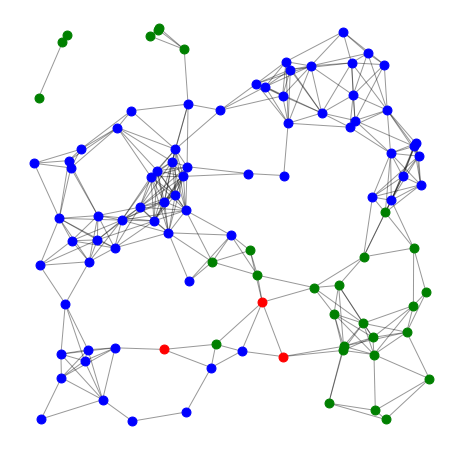

Nodes infected at time 27 : [2, 47, 60, 89]


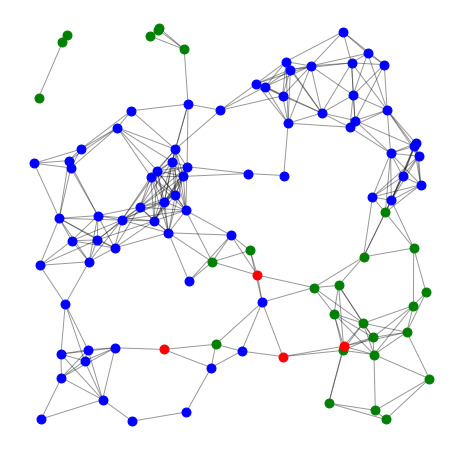

Nodes infected at time 28 : [2, 75, 79, 89]


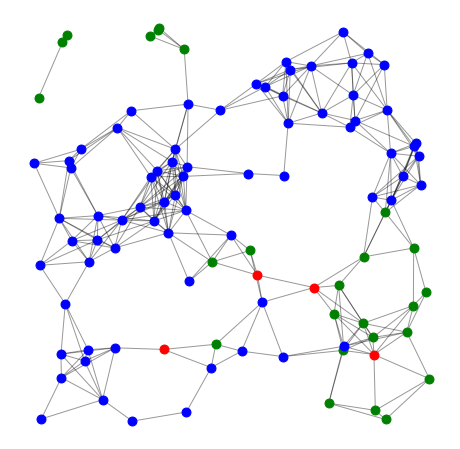

Nodes infected at time 29 : [2, 22, 26, 79, 89, 95]


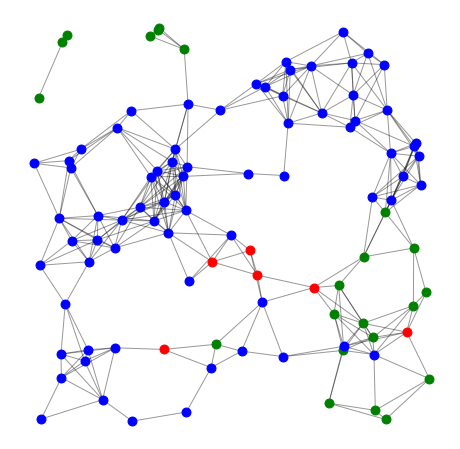

Nodes infected at time 30 : [3, 10, 71]


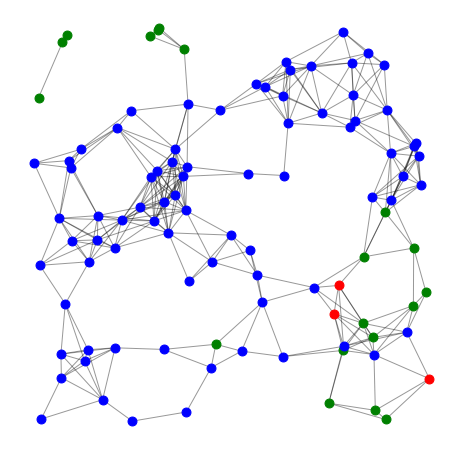

Nodes infected at time 31 : [10, 48]


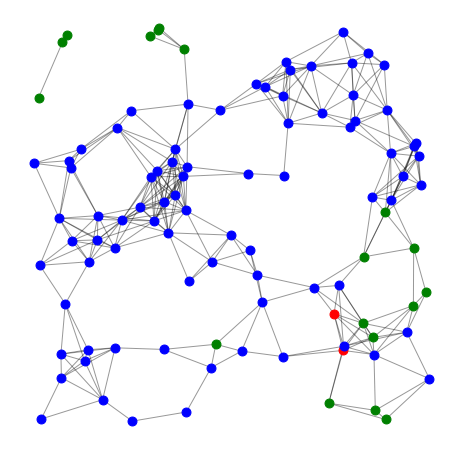

Nodes infected at time 32 : [43, 48]


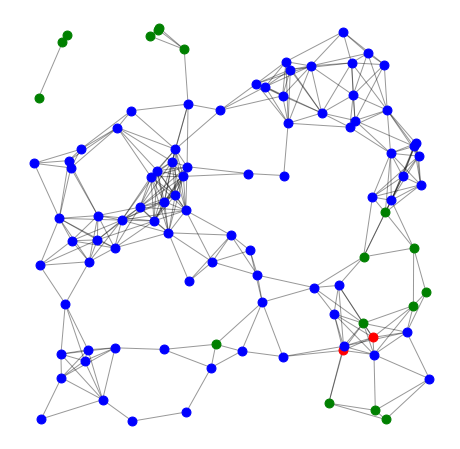

Nodes infected at time 33 : [43]


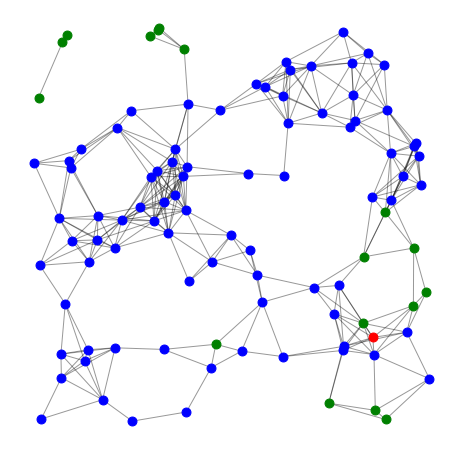

Nodes infected at time 34 : [43]


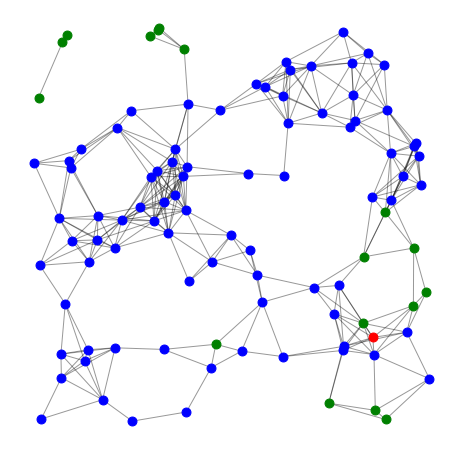

Nodes infected at time 35 : []


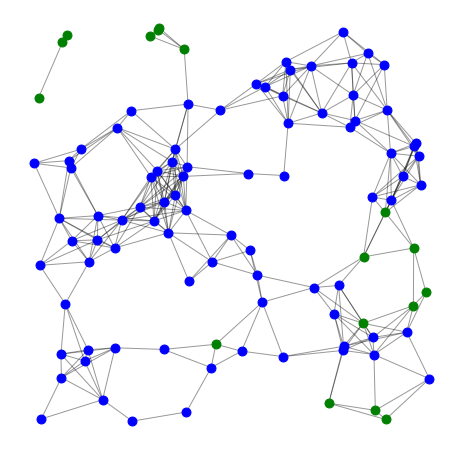

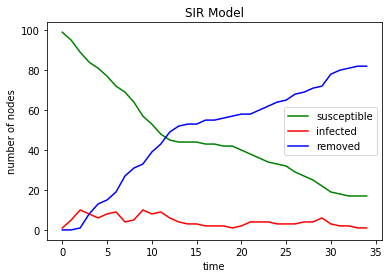

In [71]:
## Reed Frost simulation over a random geometric graph
## (used at beginning of graph section in Lab 7)
## X is no longer Markov, the state of the network is comprised of the states of all nodes

d=0.16 # distance threshold, pairs of nodes within distance d are connected by an edge
G=nx.random_geometric_graph(100,d)  #100 nodes in unit square, distance threshold d determines edges
# position is stored as node attribute data for random_geometric_graph, pull it out for plotting
pos=nx.get_node_attributes(G,'pos')



######################################
def my_display(t, X, show):
    """ The function puts numbers of nodes in states S,I,R into X[t,:]
        If (show==1 and no nodes are infected) or if show==2, G is plotted with node colors for S,I,R.
        Returns value 0 if no nodes are infected
    """
    susceptible=[]
    infected=[]
    removed=[]
    for u in G.nodes():
        if G.nodes[u]['state']=='S':
            susceptible.append(u)
        elif G.nodes[u]['state']=='I':
            infected.append(u)
        elif G.nodes[u]['state']=='R':
            removed.append(u)
    
    X[t,0] = np.size(susceptible)
    X[t,1] = np.size(infected)
    X[t,2] = np.size(removed)
    
    # show: 0=don't graph, 1 = show graph once at end, 2=show graph after each iteration
    if (show==1 and X[t,1]==0) or show==2:
        print ("Nodes infected at time",t,":",infected)
        plt.figure(figsize=(8,8))
        nx.draw_networkx_edges(G,pos,alpha=0.4)  #All edges are drawn  alpha specifies edge transparency
        nx.draw_networkx_nodes(G,pos,nodelist=susceptible,
                    node_size=80,
                    node_color='g')
        nx.draw_networkx_nodes(G,pos,nodelist=infected,
                    node_size=80,
                    node_color='r')
        nx.draw_networkx_nodes(G,pos,nodelist=removed,
                    node_size=80,
                    node_color='b')

        plt.xlim(-0.05,1.05)
        plt.ylim(-0.05,1.05)
        plt.axis('off')
        plt.show()
    
    if X[t,1]==0:
        return 0;  # No infected nodes
    else:
        return 1;  # At least one node is infected
#####################################

beta=0.3
gamma=.5
T = 40
X = np.zeros((T,3))

print ("Infection probability parameter beta=", beta) 

for u in G.nodes():  # Set the state of each node to susceptible
    G.nodes[u]['state']='S' 
    
G.nodes[0]['state']='I'   # Change state of node 0 to infected


t=0
show=2   # show: 0=don't graph, 1 = show graph once at end, 2=show graph after each iteration 
while t<T and my_display(t, X,show):   # Plot graph, fill in X[t,:], and go through loop if some node is infected
    
    for u in G.nodes():   # This loop counts number of infected neighbors of each node
        G.nodes[u]['num_infected_nbrs']=0
        for v in G.neighbors(u):
            if G.nodes[v]['state']=='I':
                G.nodes[u]['num_infected_nbrs']+=1
                
    for u in G.nodes():   # This loop updates node states
        if G.nodes[u]['state']=='I' and np.random.random() < gamma:
            G.nodes[u]['state']='R'
        elif G.nodes[u]['state']=='S' and np.random.random() > np.power(1.0-beta,G.nodes[u]['num_infected_nbrs']):
            G.nodes[u]['state']='I'
    t=t+1

plt.figure()
plt.plot(X[0:t,0], 'g', label='susceptible')
plt.plot(X[0:t,1], 'r', label='infected')
plt.plot(X[0:t,2], 'b', label='removed')
plt.title('SIR Model')
plt.xlabel('time')
plt.ylabel('number of nodes')
plt.legend()
###################################

Now let's try simulating the spread of a virus of a network obtained from real world data. Think of each node as a blog. It's neighbors are all the other blogs that it contains links to. Additionally, each blog contains a value (0,1) which represents a political party. So you can imagine a network with two large clusters (one for each party) with a smaller number of links going between the clusters.  Specifically, we upload the graph from the file pblogs.gml. (This data can be used freely though its source should be cited: Lada A. Adamic and Natalie Glance, "The political blogosphere and the 2004 US Election", in Proceedings of the WWW-2005 Workshop on the Weblogging Ecosystem (2005).)  It may take a while to load the graph, so we write the code in a box by itself so that you only need to load the graph once. 

In [74]:
###  Load G from polblogs.gml file and convert from directed to undirected graph.  May take 20 seconds.
G = nx.read_gml('polblogs.gml') # node labels are web addresses (as unicode strings)
G=G.to_undirected(reciprocal=False)
for u in G.nodes():  # Copy node labels (i.e. the urls of websites) to url values
        G.nodes[u]['url']= u
G=nx.convert_node_labels_to_integers(G) # Replace node labels by numbers 0,1,2, ...
print ("G loaded from polblogs.gml and converted to undirected graph")

G loaded from polblogs.gml and converted to undirected graph


In [109]:
#Here are some methods for exploring properties of the graph
#uncomment next line to see attributes of all nodes of G
#print (G.nodes(data=True))   # note, for example, that node 1 has url rightrainbow.com
#uncomment next line to see (node,degree) pairs sorted by decreasing degree
print (sorted(G.degree(),key=itemgetter(1),reverse=True))
#uncomment to see the neighbors of node 6
print (G.neighbors(6))

[(1446, 351), (1384, 306), (230, 301), (720, 277), (1034, 274), (924, 243), (90, 223), (470, 218), (1055, 211), (622, 199), (960, 196), (260, 182), (388, 179), (1476, 171), (171, 170), (376, 170), (375, 149), (21, 147), (686, 147), (906, 144), (589, 143), (663, 138), (1061, 138), (1200, 138), (128, 137), (771, 136), (450, 133), (1318, 133), (641, 130), (784, 129), (919, 128), (1144, 128), (1199, 128), (117, 125), (214, 123), (812, 123), (200, 122), (1246, 122), (1351, 121), (1436, 120), (600, 118), (847, 117), (1194, 117), (1091, 116), (1296, 114), (181, 112), (883, 111), (1096, 111), (1219, 110), (236, 108), (1453, 107), (1249, 105), (631, 104), (933, 104), (1102, 104), (1129, 104), (85, 103), (226, 102), (283, 102), (459, 101), (80, 99), (928, 98), (1360, 98), (61, 97), (759, 97), (950, 97), (250, 96), (1441, 96), (1467, 96), (636, 95), (914, 94), (111, 93), (187, 93), (1420, 93), (271, 92), (1222, 92), (1463, 92), (132, 91), (884, 91), (325, 90), (380, 89), (1234, 89), (245, 88), (1

Infection probability parameter beta= 0.3
1490


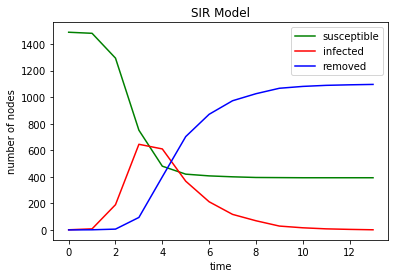

In [85]:
######### Simulate Reed Frost dynamics over undirected graph G, assuming G is loaded

def my_count(t, X):
    """ The function puts numbers of nodes in states S,I,R into X[t,:]
        Returns value 0 if no nodes are infected
    """
    susceptible=[]
    infected=[]
    removed=[]
    for u in G.nodes():
        if G.nodes[u]['state']=='S':
            susceptible.append(u)
        elif G.nodes[u]['state']=='I':
            infected.append(u)
        elif G.nodes[u]['state']=='R':
            removed.append(u)
    
    X[t,0] = np.size(susceptible)
    X[t,1] = np.size(infected)
    X[t,2] = np.size(removed)
    
    if X[t,1]==0:
        return 0;  # No infected nodes
    else:
        return 1;  # At least one node is infected
#####################################

beta=0.3
gamma=.5
T = 40
X = np.zeros((T,3))

print ("Infection probability parameter beta=", beta) 

for u in G.nodes():  # Set the state of each node to susceptible
    G.nodes[u]['state']='S' 
    
G.nodes[1]['state']='I'   # Change state of node 1 to infected


t=0
while t<T and my_count(t, X):   # Fill in X[t,:], and go through loop if some node is infected
    
    for u in G.nodes():   # This loop counts number of infected neighbors of each node
        G.nodes[u]['num_infected_nbrs']=0
        for v in G.neighbors(u):
            if G.nodes[v]['state']=='I':
                G.nodes[u]['num_infected_nbrs']+=1
                
    for u in G.nodes():   # This loop updates node states
        if G.nodes[u]['state']=='I' and np.random.random() < gamma:
            G.nodes[u]['state']='R'
        elif G.nodes[u]['state']=='S' and np.random.random() > np.power(1.0-beta,G.nodes[u]['num_infected_nbrs']):
            G.nodes[u]['state']='I'
    t=t+1
    
plt.figure()
plt.plot(X[0:t,0], 'g', label='susceptible')
plt.plot(X[0:t,1], 'r', label='infected')
plt.plot(X[0:t,2], 'b', label='removed')
plt.title('SIR Model')
plt.xlabel('time')
plt.ylabel('number of nodes')
plt.legend()


Run the code above a few times to see the variation.  This graph has a much larger variation of degrees of the nodes than the random geometric graphs we simulated earlier.<br><br>
**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>**  

1. Adapt the code in the previous cell to run N=100 times and calculate the average number of susceptible nodes remaining after no infected nodes are left.   Also, to get an idea of how accurately your average predicts the true mean, compute the sample standard deviation divided by sqrt(N).  See <A href=http://en.wikipedia.org/wiki/Standard_deviation#Corrected_sample_standard_deviation> wikipedia </A> for definitions of sample mean and sample standard deviation (use either corrected or uncorrected version of sample standard variance) or use numpy.mean() and numpy.std().   Dividing the standard deviation of the samples by sqrt(N) estimates the standard deviation of your estimate of the mean.  So if you were to increase N, your observed standard deviation wouldn't change by much, but your observed mean will be more accurate.
2. Now, you must let node 1 be initially infected, but you may remove ten carefully selected nodes before starting the simulations.  Try to think of a good choice of which nodes to remove so as to best reduce the number of nodes that become infected. (You could use the method G.remove_node(n) to remove node $n$ from the graph $G$, but it would run faster to just initialize the state variable for the removed nodes to R but leave the node in $G.$)   Then again compute the mean and estimated accuracy as before, for the number of nodes that are susceptible at the end of the simulation runs.   Explain the reasoning you used.    Ideally you should be able to increase the number of remaining susceptible nodes by at least ten percent for this example.

In [97]:
#problem 1
s_count=[]
for i in range(100):
    beta=0.3
    gamma=.5
    T = 40
    X = np.zeros((T,3))
    n_count=0


    for u in G.nodes():  # Set the state of each node to susceptible
        n_count+=1
        G.nodes[u]['state']='S' 
    
        G.nodes[1]['state']='I'   # Change state of node 1 to infected


    t=0
    n_count-=1
    while t<T and my_count(t, X):   # Fill in X[t,:], and go through loop if some node is infected
    
        for u in G.nodes():   # This loop counts number of infected neighbors of each node
            G.nodes[u]['num_infected_nbrs']=0
            for v in G.neighbors(u):
                if G.nodes[v]['state']=='I':
                    G.nodes[u]['num_infected_nbrs']+=1
                
        for u in G.nodes():   # This loop updates node states
            if G.nodes[u]['state']=='I' and np.random.random() < gamma:
                G.nodes[u]['state']='R'
            elif G.nodes[u]['state']=='S' and np.random.random() > np.power(1.0-beta,G.nodes[u]['num_infected_nbrs']):
                G.nodes[u]['state']='I'
                n_count-=1
        t=t+1
    s_count.append(n_count)
print("average number of susceptible nodes remaining:",np.mean(s_count))

print("the sample standard deviation of sample:",np.std(s_count))
print("standard deviation of estimate of the mean",np.std(s_count/np.sqrt(100)))

average number of susceptible nodes remaining: 396.89
the sample standard deviation of sample: 13.875081981739784
standard deviation of estimate of the mean 1.3875081981739785


In [115]:
#problem 2
delete_list=sorted(G.degree(),key=itemgetter(1),reverse=True)
#print(delete_list)
s_count=[]
for i in range(100):
    beta=0.3
    gamma=.5
    T = 40
    X = np.zeros((T,3))


    for u in G.nodes():  # Set the state of each node to susceptible
        n_count+=1
        G.nodes[u]['state']='S' 
    
    G.nodes[1]['state']='I'   # Change state of node 1 to infected
    count=0
    for j in delete_list:
        if j[0]!=1 and count!=10:
            G.nodes[j[0]]['state']='R' 
            count+=1
    
            
    
    t=0
   
    while t<T and my_count(t, X):   # Fill in X[t,:], and go through loop if some node is infected
    
        for u in G.nodes():   # This loop counts number of infected neighbors of each node
            G.nodes[u]['num_infected_nbrs']=0
            for v in G.neighbors(u):
                if G.nodes[v]['state']=='I':
                    G.nodes[u]['num_infected_nbrs']+=1
                
        for u in G.nodes():   # This loop updates node states
            if G.nodes[u]['state']=='I' and np.random.random() < gamma:
                G.nodes[u]['state']='R'
            elif G.nodes[u]['state']=='S' and np.random.random() > np.power(1.0-beta,G.nodes[u]['num_infected_nbrs']):
                G.nodes[u]['state']='I'
             
        t=t+1
    s_count.append(X[t,0])

print(s_count)
print("average number of susceptible nodes remaining:",np.mean(s_count))

print("the sample standard deviation of sample:",np.std(s_count))
print("standard deviation of estimate of the mean",np.std(s_count/np.sqrt(100)))

[444.0, 455.0, 451.0, 442.0, 449.0, 427.0, 444.0, 438.0, 435.0, 422.0, 439.0, 428.0, 441.0, 435.0, 435.0, 433.0, 454.0, 441.0, 437.0, 443.0, 449.0, 423.0, 445.0, 451.0, 432.0, 430.0, 442.0, 450.0, 435.0, 450.0, 451.0, 457.0, 454.0, 427.0, 440.0, 431.0, 418.0, 453.0, 448.0, 430.0, 448.0, 452.0, 452.0, 429.0, 441.0, 454.0, 451.0, 442.0, 441.0, 455.0, 442.0, 441.0, 452.0, 434.0, 453.0, 454.0, 452.0, 459.0, 446.0, 461.0, 433.0, 457.0, 452.0, 441.0, 448.0, 440.0, 444.0, 448.0, 436.0, 444.0, 448.0, 450.0, 428.0, 429.0, 449.0, 434.0, 439.0, 433.0, 437.0, 455.0, 423.0, 449.0, 456.0, 420.0, 456.0, 431.0, 426.0, 453.0, 459.0, 440.0, 449.0, 453.0, 461.0, 425.0, 429.0, 432.0, 446.0, 454.0, 450.0, 446.0]
average number of susceptible nodes remaining: 442.71
the sample standard deviation of sample: 10.436757159194611
standard deviation of estimate of the mean 1.0436757159194614


__Answer:__ <br>
I delete the 10 node which has the largest degree, which means they have more connection than other in the whole society.
if we delete them, we see now number of susceptiple increase by about 10% obviously.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>** 

In [119]:
###  LEFTOVER CODE :  READ IF INTERESTED BUT THERE IS NO LAB QUESTION FOR THIS
###  Each node of the graph G loaded from polblogs.gml has a value,
###  either 0 or 1, indicating whether the node corresponds to
###  a politically liberal website or a politically conservative website.
###  For fun, this code does the Reed Frost simulation (without gamma)
###  and breaks down each of the S,I,R counts into the two values.
###  An idea was to see if we could cluster the nodes by infecting one
###  node and then seeing if other nodes in the same cluster are more
###  likely to be infected.   Indeed, in the simulation we see nodes
###  with the same value as node 1 getting infected sooner.   By the end,
###  though, the number infected from the other value catch up.


#####################################
def my_print(t):
    numS=np.array([0,0])
    numI=np.array([0,0])
    numR=np.array([0,0])
    for u in G.nodes():
        if G.nodes[u]['state']=='S':
            numS[G.nodes[u]['value']]+=1
        elif G.nodes[u]['state']=='I':
            numI[G.nodes[u]['value']]+=1
        elif G.nodes[u]['state']=='R':
            numR[G.nodes[u]['value']]+=1
    print ("{0:3d}: {1:5d}  {2:5d}  {3:5d}  {4:5d}  {5:5d}  {6:5d}"\
        .format(t,numS[0], numS[1], numI[0],numI[1],numR[0],numR[1]))
    if np.sum(numI)==0:
        return 0;  # No infected nodes
    else:
        return 1;  # At least one node is infected
#####################################

beta=0.3
print ("Infection probability parameter beta=", beta) 
print (" t    Susceptible    Infected      Removed")

for u in G.nodes():  # Set the state of each nodes to susceptible
    G.nodes[u]['state']='S' 
    
G.nodes[1]['state']='I'   # Change state of node 1 to infected
t=0

while my_print(t):   # Plot graph and go through loop if some node is infected
    
    for u in G.nodes():   # This loop counts number of infected neighbors of each node
        G.nodes[u]['num_infected_nbrs']=0
        for v in G.neighbors(u):
            if G.nodes[v]['state']=='I':
                G.nodes[u]['num_infected_nbrs']+=1
                
    for u in G.nodes():   # This loop updates node states
        if G.nodes[u]['state']=='I':
            G.nodes[u]['state']='R'
        elif G.nodes[u]['state']=='S' and np.random.random() > np.power(1.0-beta,G.nodes[u]['num_infected_nbrs']):
            G.nodes[u]['state']='I'
    t=t+1
print ("finished")

Infection probability parameter beta= 0.3
 t    Susceptible    Infected      Removed
  0:   758    731      0      1      0      0
  1:   758    725      0      6      0      1
  2:   753    621      5    104      0      7
  3:   653    281    100    340      5    111
  4:   346    184    307     97    105    451
  5:   296    181     50      3    412    548
  6:   293    180      3      1    462    551
  7:   293    180      0      0    465    552
finished


## Lab Questions:

For this weeks lab, please answer all questions 1-4.

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 